### **Lista 5**
##### Rafał Głodek
***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
from scipy.optimize import fsolve

Zadanie 1

In [8]:
def poly_interpol(x, y):
    omega = np.poly1d([1])
    n = len(x)
    for i in range(n):
        omega = np.polymul(omega, np.poly1d([1, -x[i]]))
    w = np.poly1d([0])
    omega_p = np.polyder(omega, 1)
    for i in range(n):
        omega_px = omega_p(x[i])
        w = np.polyadd(w, y[i] * np.polydiv(omega, np.poly1d([1,-x[i]]) * omega_px)[0])
    return w
    

In [19]:
print(poly_interpol([0,3,6], [1.255, 0.905, 0.652]))

          2
0.005389 x - 0.1328 x + 1.255


Zadanie 2

In [1]:
from scipy.interpolate import CubicSpline

In [3]:
spl = CubicSpline([0.2, 2, 20, 200, 2000, 20000], [103, 13.9, 2.72, 0.8, 0.401, 0.433])

In [ ]:
Re = [5, 50, 5000]
for r in Re:
    print(f"Wartość dla Re = {r}:\nc = {spl(r)}")

Wartość dla Re = 5:
c = -84.02350372537349
Wartość dla Re = 50:
c = 436.413792186683
Wartość dla Re = 5000:
c = 54738.99116845934


Zadanie 3

In [9]:
print("Interpolacja wielomianowa (zad 1)")
c_d = poly_interpol([0.2, 2, 20, 200, 2000, 20000], [103, 13.9, 2.72, 0.8, 0.401, 0.433])
for r in Re:
    print(f"Wartość dla Re = {r}:\nc = {c_d(r)}")

Interpolacja wielomianowa (zad 1)
Wartość dla Re = 5:
c = -96.10046207185488
Wartość dla Re = 50:
c = 2581.144117967352
Wartość dla Re = 5000:
c = 1658455172.0854998


Zadanie 4

Nakładamy logarytm na funkcję aproksymującą $f$
$$
g(x) = \ln(f) = \ln(ae ^ {bx}) = \ln(a) + bx = c + bx
$$

I robimy klasyczną regresję liniową dla funkcji $g$. Wzory:
$$
b = \frac{\sum(X_i - \overline{X})(Y_i - \overline{Y})}{\sum(X_i - \overline{X})^{2}}
$$
$$
c = \overline{Y} - b\overline{X}
$$

In [3]:
def linear_regression(x,y):
    b = np.sum((x-np.mean(x)) * (y - np.mean(y)))/np.sum((x - np.mean(x))**2)
    c = np.mean(y) - b * np.mean(x)
    return b, c

In [5]:
xs = np.array([1.2,2.8,4.3,5.4,6.8,7.9])
ys = np.array([7.5,16.1,38.9,67.0,146.6,266.2])
ys_log = np.log(ys)

In [8]:
b, c = linear_regression(xs, ys)
a = np.exp(c)
f_aprox = lambda x: a * np.exp(b * x)

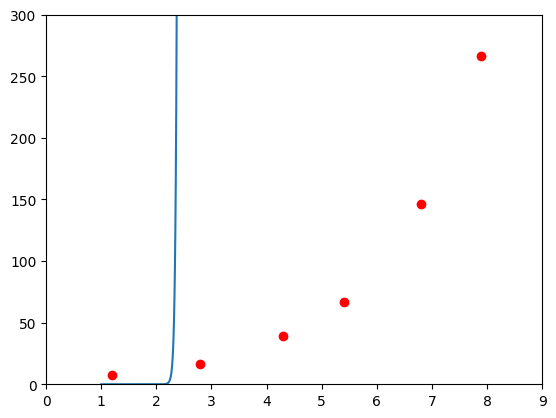

In [19]:
x_lin = np.linspace(1,9,1000)
plt.scatter(xs, ys, c="r")
plt.plot(x_lin, f_aprox(x_lin))
plt.ylim(0,300)
plt.xlim(0,9)
plt.show()